# Visualization

In [1]:
## 1 λεπτό

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns


data = pd.read_csv("/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (εξόρυξη)/αρχείο/datasets/OnlineNewsPopularity.txt")
X = data.iloc[:,0:60]
y = data.iloc[:,-1]


## Επειδή το αρχικό dataset έχει ως "y" μια συνεχή μεταβλητή, μπορεί να γίνει μόνο regression
## Για να κάνουμε και classification, πρέπει το dataset να έχει ως "y" και μια διακριτή μεταβλητή
yLabel = []
for i in range(np.shape(data)[0]):
    if data.iloc[:,60][i] >= 1400:
        yLabel.append("popular")
    else:
        yLabel.append("unpopular")

<br><br><br><br>
## **Visualization**

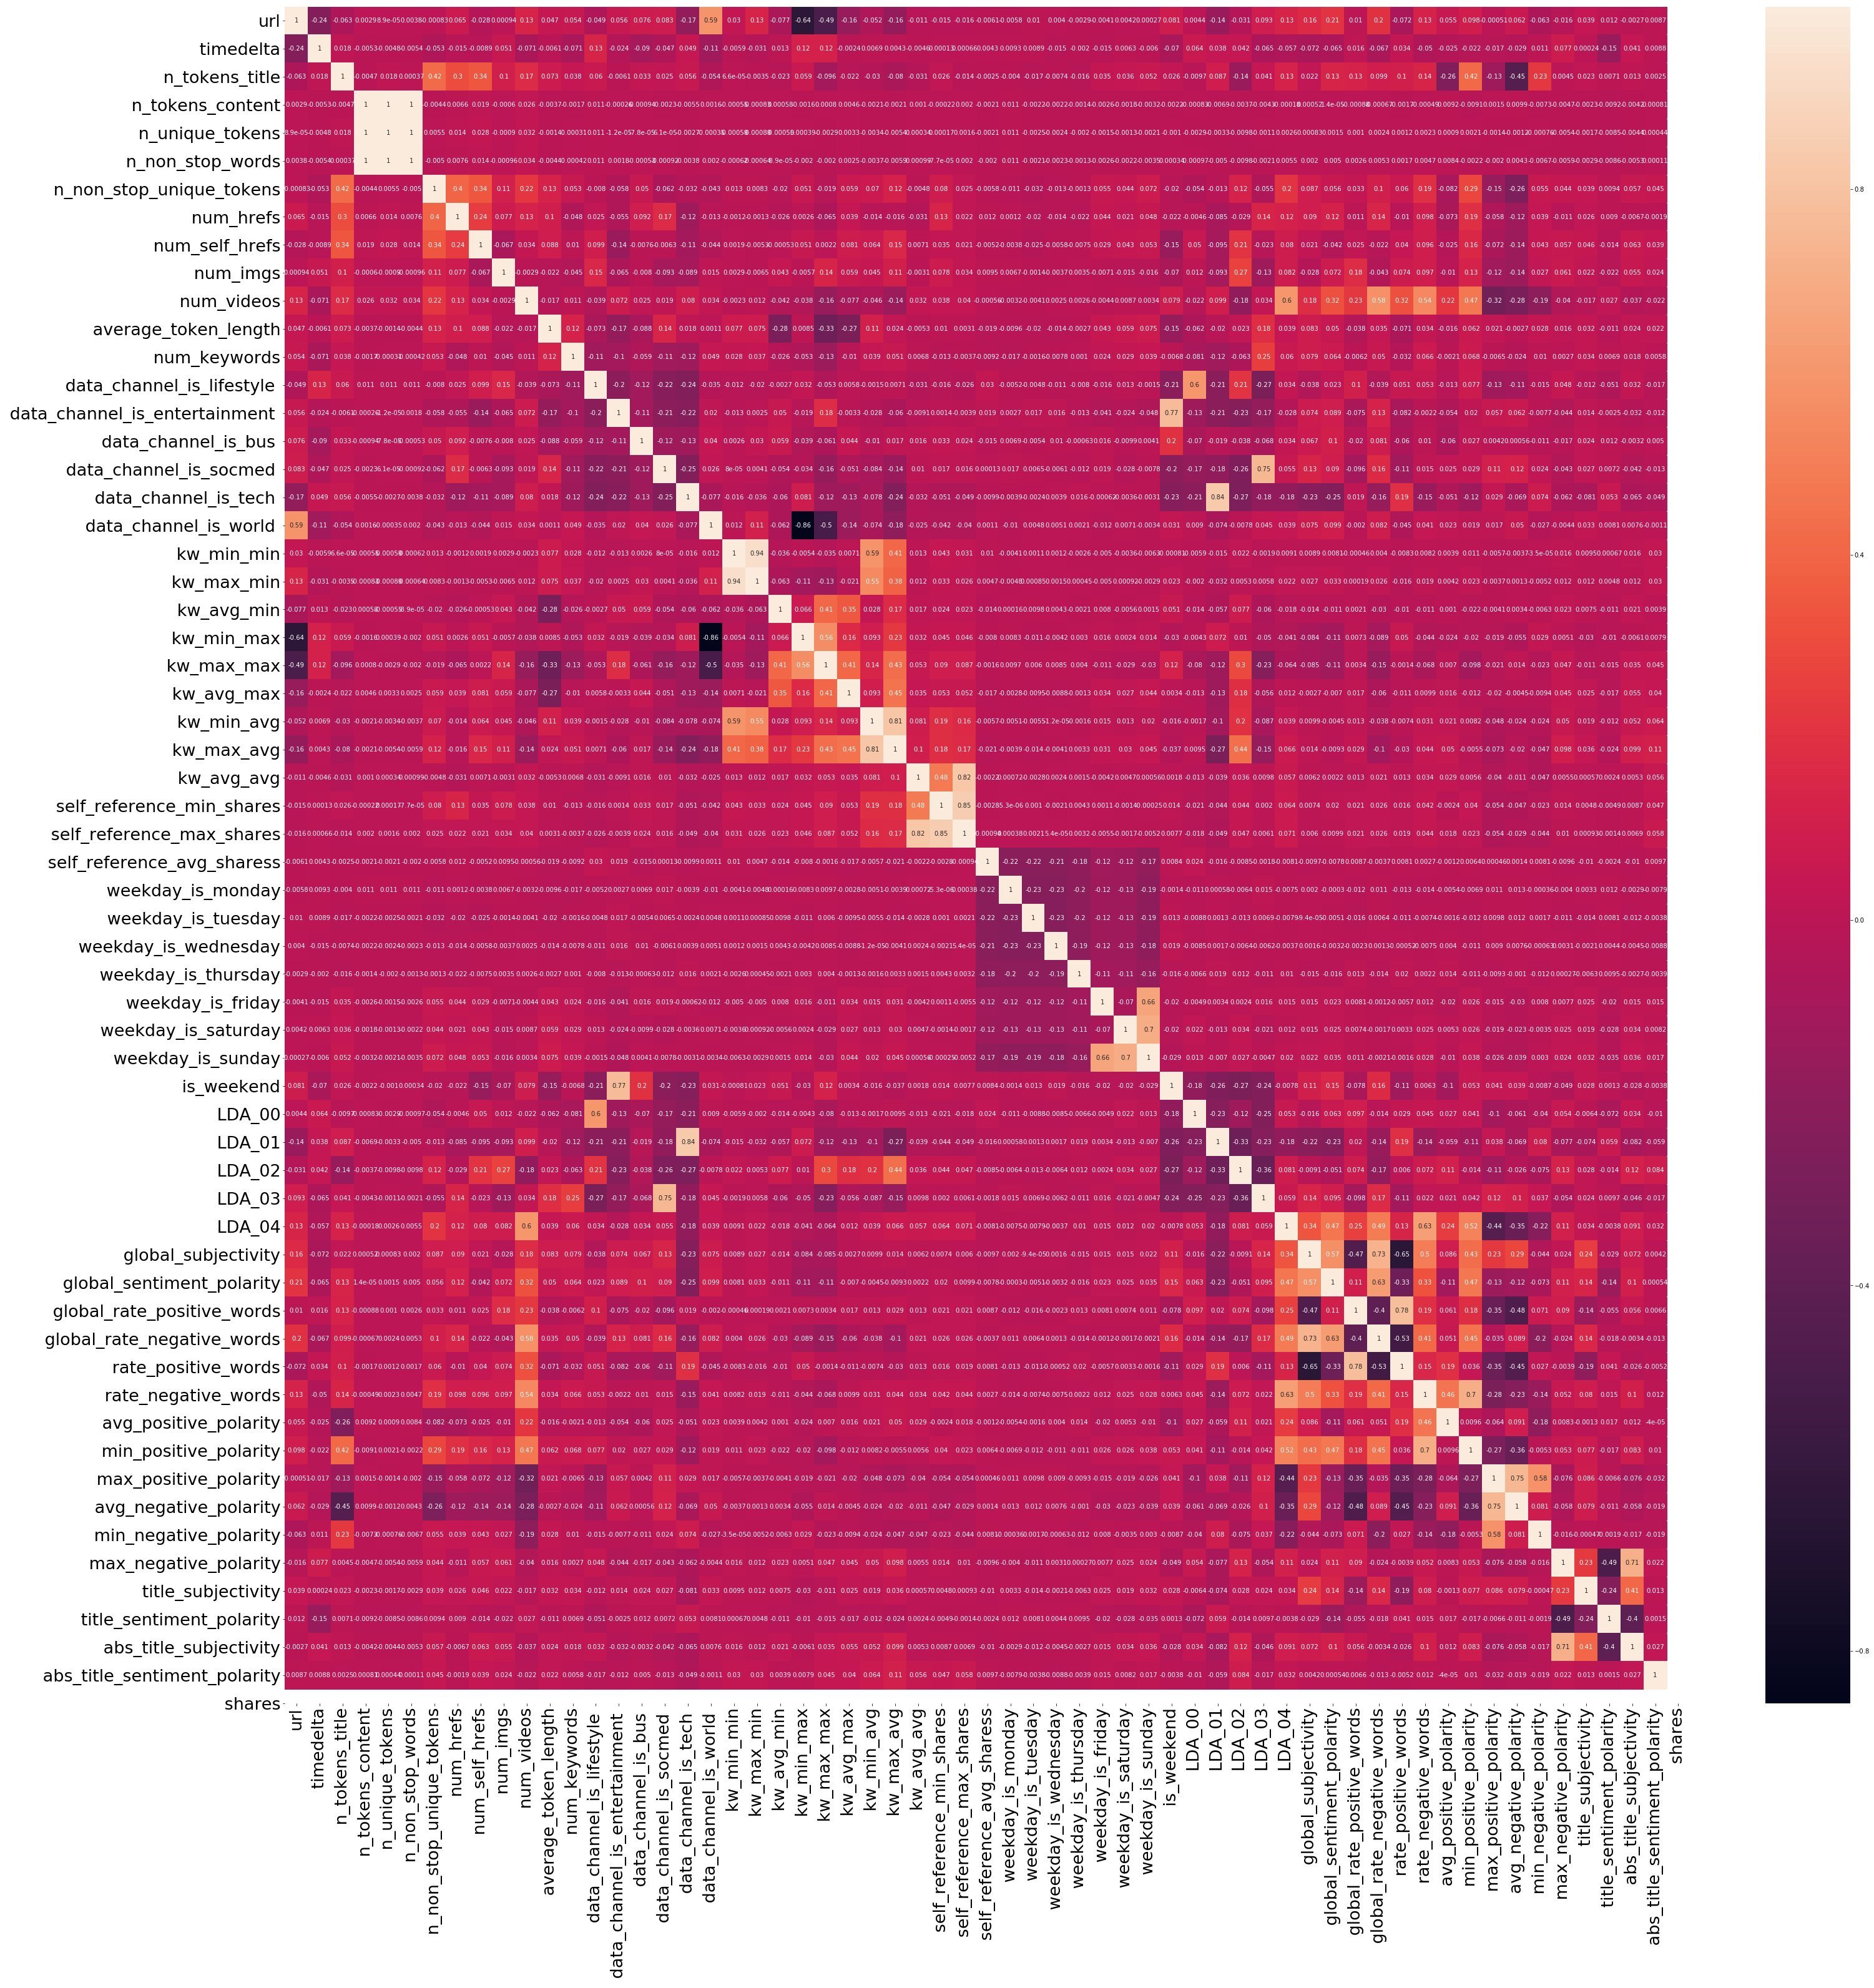

 shares                            1.000000
 kw_avg_avg                        0.110413
 LDA_03                            0.083771
 kw_max_avg                        0.064306
 self_reference_avg_sharess        0.057789
 self_reference_min_shares         0.055958
 self_reference_max_shares         0.047115
 num_hrefs                         0.045404
 kw_avg_max                        0.044686
 kw_min_avg                        0.039551
 num_imgs                          0.039388
 global_subjectivity               0.031604
 kw_avg_min                        0.030406
 kw_max_min                        0.030114
 abs_title_sentiment_polarity      0.027135
 num_videos                        0.023936
 title_subjectivity                0.021967
 num_keywords                      0.021818
 is_weekend                        0.016958
 weekday_is_saturday               0.015082
 title_sentiment_polarity          0.012772
 avg_positive_polarity             0.012142
 max_positive_polarity          

In [3]:
# κάνω το θερμικό διάγραμμα που δείχνει πόσο σχετίζονται τα features μεταξύ τους
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50,50
sns.heatmap(data.corr() , annot=True , xticklabels=data.columns, yticklabels=data.columns)

sns.set(font_scale=2)
plt.tick_params(axis='x', labelsize=27)
plt.tick_params(axis='y', labelsize=27)
plt.savefig("heatmap.png")
plt.show()

corrmat = data.corr()
corrmat.iloc[:,59].sort_values(ascending=False)

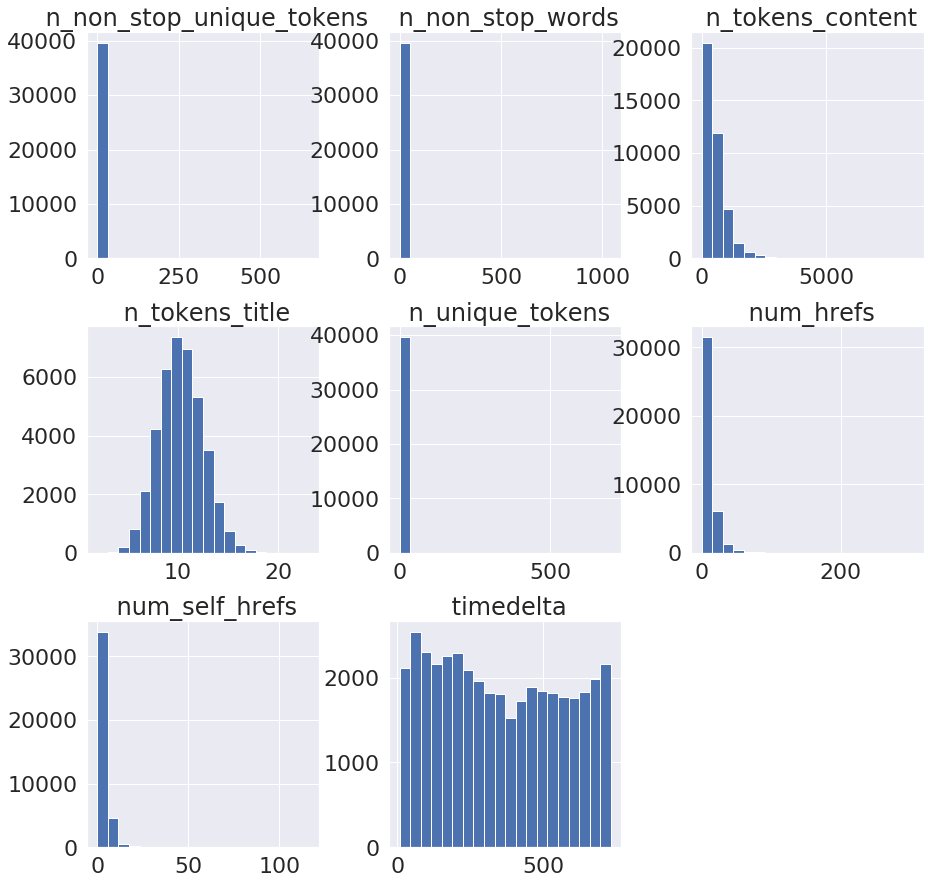

In [4]:
## κάνουμε κάποια ιστογρράμματα στα δεδομένα
data.iloc[:,0:9].hist(bins=20 , figsize=(15,15))
plt.savefig("histogram1.png")
plt.show()

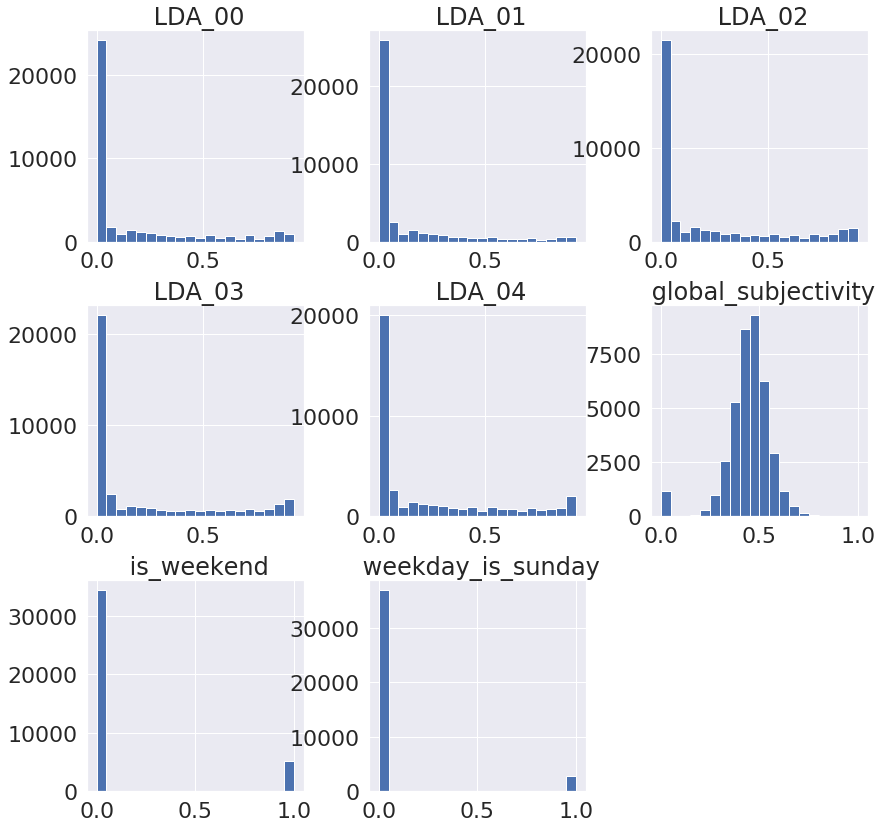

In [5]:
data.iloc[:,37:45].hist(bins=20 , figsize=(14,14))
plt.savefig("histogram2.png")
plt.show()

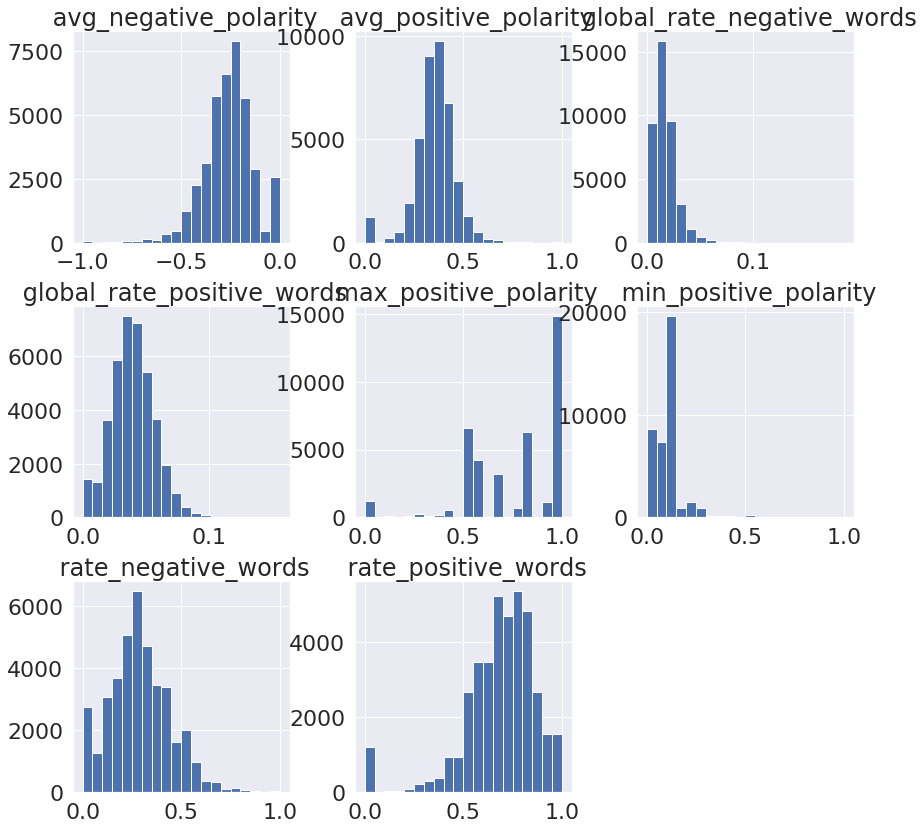

In [6]:
data.iloc[:,46:54].hist(bins=20 , figsize=(14,14))
plt.savefig("histogram3.png")
plt.show()

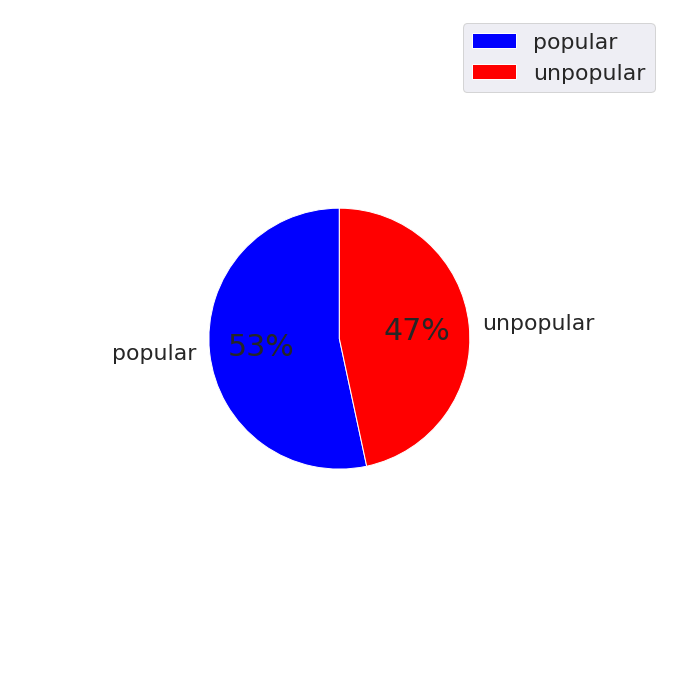

In [7]:
## βλέπουμε πόσο ζυγισμένες είναι οι 2 κλάσεις
lenPop = 0
lenUnpop = 0
for i in range(np.shape(data)[0]):
    if yLabel[i] == "popular":
        lenPop = lenPop + 1
    else:
        lenUnpop = lenUnpop + 1
plt.rcParams['font.size'] = 30.0       
labels = ['popular', 'unpopular']
colors = ['blue' , 'red']
sizes = [lenPop,lenUnpop]

plt.figure(figsize = (12, 12))
patches, texts, autotexts = plt.pie(sizes, colors=colors, labels=labels, autopct='%.0f%%',shadow=False, radius=0.5,startangle=90)
plt.legend(loc='best')
plt.savefig("pie.png")
plt.show()

In [8]:
# παίρνω τα features από το dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)

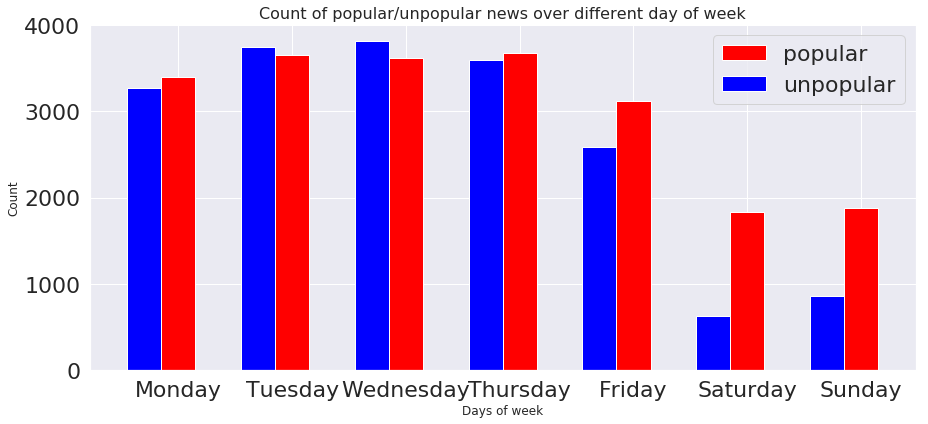

In [9]:
# Κοιτάω σε ποίες μέρες της εβδομάδας είναι πιο δημοφιλή τα άρθρα
columns_day = features_raw.columns.values[29:36]
unpop = data[data[' shares']<1400]
pop = data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values
columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ##


import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
fig = pl.figure(figsize = (13,6))

pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'red', label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'blue', label = "unpopular")

pl.xticks(np.arange(len(columns_day)), columns)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.png")
pl.show()

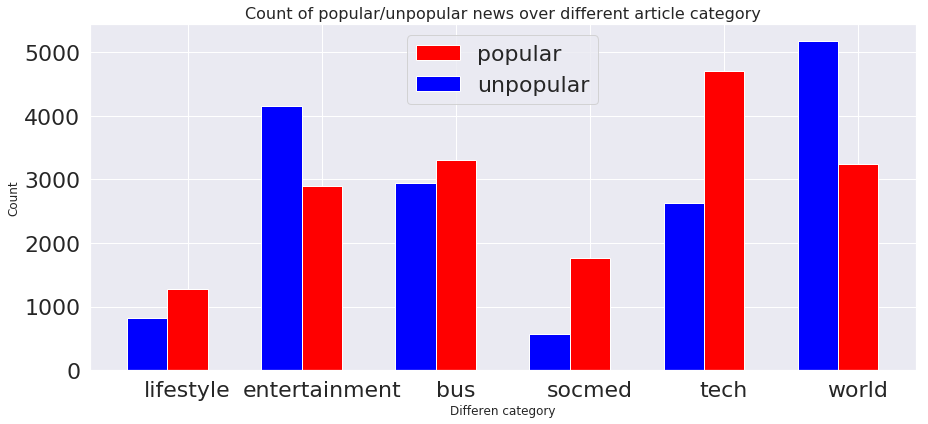

In [10]:
# κάνω γράφημα πίτας με το πόσο δημοφιλή είναι τα άρθρα ανά κατηγορία θέματος άρθρου
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
columns_chan = ['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world'] ##

fig = pl.figure(figsize = (13,6))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'red', label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'blue', label = "unpopular")

pl.xticks(np.arange(len(columns_chan)), columns_chan)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.png")
pl.show()

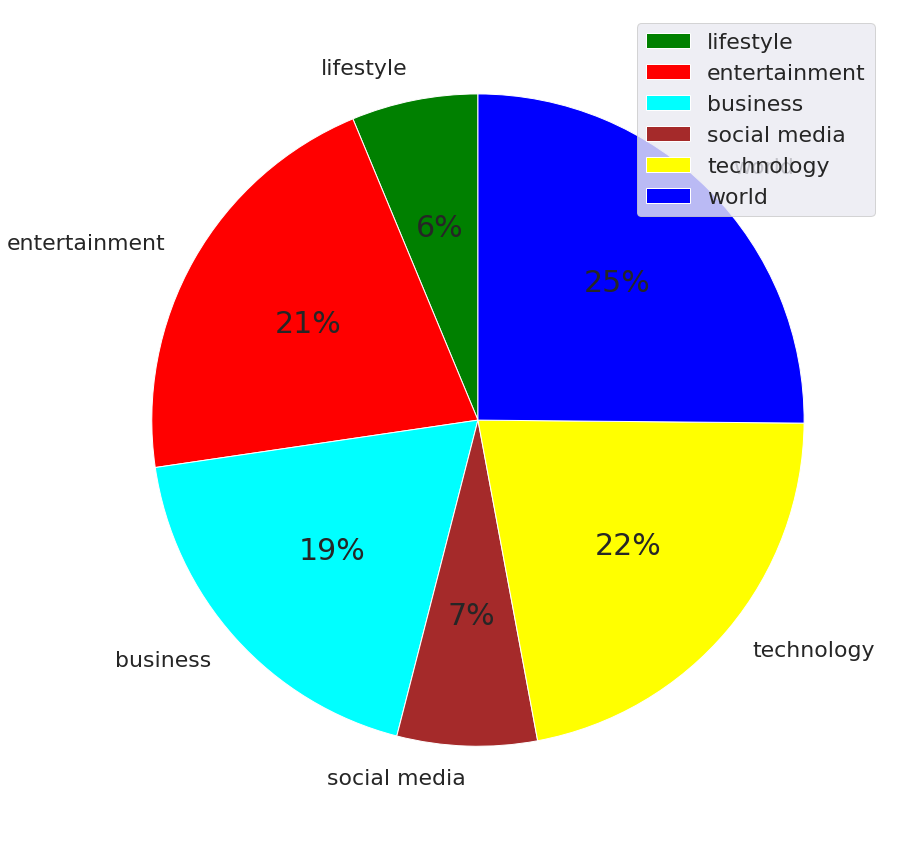

In [11]:
# βλέπω τι είδους άρθρα έχουν πιο πολύ απείχηση στον κόσμο
ent1 = 0
bus1 = 0
tech1 = 0
life1 = 0
world1 = 0
scomed1 = 0
for i in range(np.shape(data)[0]):
    if data.iloc[:,13][i] == 1:
        life1 = life1 + 1
    if data.iloc[:,14][i] == 1:
        ent1 = ent1 + 1
    if data.iloc[:,15][i] == 1:
        bus1 = bus1 + 1
    if data.iloc[:,16][i] == 1:
        scomed1 = scomed1 + 1
    if data.iloc[:,17][i] == 1:
        tech1 = tech1 + 1
    if data.iloc[:,18][i] == 1:
        world1 = world1 + 1
        
        
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0       
labels = ['lifestyle', 'entertainment', 'business', 'social media', 'technology', 'world']
colors = ['green' , 'red' , 'cyan' , 'brown' , 'yellow' , 'blue']
sizes = [life1,ent1,bus1,scomed1,tech1,world1]

plt.figure(figsize = (15, 15))
patches, texts, autotexts = plt.pie(sizes, colors=colors, labels=labels, autopct='%.0f%%',shadow=False, radius=1,startangle=90)
plt.legend(loc='best')
plt.savefig("type.png")
plt.show()